In [80]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns

In [81]:
data=pd.read_csv("train.csv")

In [82]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [83]:
## Label encoding
data.Loan_Status=data.Loan_Status.map({'Y':1,'N':0})
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Married=data.Married.map({'Yes':1,'No':0})
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [84]:
Loan_status=data.Loan_Status

In [85]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


In [86]:
data.shape

(614, 13)

In [87]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.813644,0.651391,0.762938,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459,0.687296
std,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000


In [88]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [89]:
#It's time to fill the missing values
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)
data.Married.fillna(np.random.randint(0,2),inplace=True)
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)
data.Gender.fillna(np.random.randint(0,2),inplace=True)
data.Dependents.fillna(data.Dependents.median(),inplace=True)
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

In [90]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [91]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    502
0.0    112
Name: Gender, dtype: int64

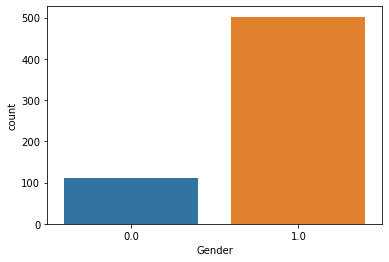

In [92]:
sns.countplot(data['Gender'])
data.Gender.value_counts()

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    398
0.0    216
Name: Married, dtype: int64

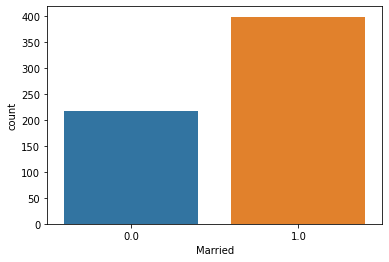

In [93]:
sns.countplot(data['Married'])
data.Married.value_counts()

In [94]:
data.drop('Loan_ID',inplace=True,axis=1)
data.drop('Loan_Status',axis=1,inplace=True)

In [95]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0
610,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,2
612,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,2


In [96]:
train_X=data.iloc[:614,] ## all the data in X (Train set)
train_y=Loan_status  ## Loan status will be our Y

In [97]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0
610,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,2
612,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,2


In [98]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,test_size=0.25,random_state=0)

In [99]:
train_X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,1.0,1.0,1.0,1,0.0,5649,0.0,44.0,360.0,1.0,2
272,1.0,0.0,0.0,1,0.0,2833,1857.0,126.0,360.0,1.0,0
474,1.0,0.0,2.0,1,0.0,5532,4648.0,162.0,360.0,1.0,0
382,0.0,0.0,0.0,1,0.0,6000,0.0,156.0,360.0,1.0,2
283,0.0,0.0,0.0,1,0.0,1811,1666.0,54.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
277,1.0,1.0,0.0,1,0.0,3103,1300.0,80.0,360.0,1.0,2
9,1.0,1.0,1.0,1,0.0,12841,10968.0,349.0,360.0,1.0,1
359,1.0,1.0,3.0,1,0.0,5167,3167.0,200.0,360.0,1.0,1
192,1.0,1.0,0.0,0,0.0,6033,0.0,160.0,360.0,1.0,2


In [100]:
test_X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1.0,0.0,0.0,1,1.0,7085,0.0,84.0,360.0,1.0,1
52,0.0,0.0,0.0,1,0.0,4230,0.0,112.0,360.0,1.0,1
536,1.0,1.0,0.0,1,0.0,6133,3906.0,324.0,360.0,1.0,2
469,1.0,1.0,0.0,1,0.0,4333,2451.0,110.0,360.0,1.0,2
55,1.0,1.0,2.0,1,0.0,2708,1167.0,97.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
399,0.0,0.0,0.0,1,0.0,1500,1800.0,103.0,360.0,0.0,1
89,1.0,1.0,0.0,1,0.0,5695,4167.0,175.0,360.0,1.0,1
271,1.0,1.0,0.0,1,0.0,11146,0.0,136.0,360.0,1.0,2
563,1.0,0.0,0.0,0,1.0,5800,0.0,132.0,360.0,1.0,1


# Using Different types of Machine Learning Model

In [101]:
from sklearn.svm import SVC

In [102]:

def classify(model, train_X, train_y):
    train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,test_size=0.25,random_state=0)
    model.fit(train_X, train_y)
    print("Accuracy is", model.score(test_X,test_y)*100)
    Y_predicted=model.predict(test_X)
    return Y_predicted,test_y.values
    

In [113]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
model = LogisticRegression(solver='lbfgs', max_iter=1000)
predicted,test=classify(model, train_X, train_y)
print ("\nPredicted values are: ",predicted)
print ("\n\nActual values are: ",test)
matrix=metrics.confusion_matrix(test,predicted)
print("\nConfusion matrix is : ",matrix)

Accuracy is 79.13043478260869

Predicted values are:  [1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1]


Actual values are:  [1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 1]

Confusion matrix is :  [[15 22]
 [ 2 76]]


In [70]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
predicted,test=classify(model, train_X, train_y)
print ("\nPredicted values are: ",predicted)
print ("\n\nActual values are: ",test)
matrix=metrics.confusion_matrix(test,predicted)
print("\nConfusion matrix is : ",matrix)

Accuracy is 65.21739130434783

Predicted values are:  [1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0
 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 1]


Actual values are:  [1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 1]

Confusion matrix is :  [[20 17]
 [23 55]]


In [71]:
from sklearn.svm import SVC
model = SVC()
predicted,test=classify(model, train_X, train_y)
print ("\nPredicted values are: ",predicted)
print ("\n\nActual values are: ",test)
matrix=metrics.confusion_matrix(test,predicted)
print("\nConfusion matrix is : ",matrix)

Accuracy is 67.82608695652173

Predicted values are:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


Actual values are:  [1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 1]

Confusion matrix is :  [[ 0 37]
 [ 0 78]]


In [74]:
import pickle
import os.path
from os import path
# now you can save it to a file
if(path.exists("ML_Model.pkl")==False):
    pickle_out=open('ML_Model.pkl', 'wb')
    pickle.dump(model, pickle_out)
    pickle_out.close()